#**ANALISIS PREFERENSI PENONTON DRAMA KOREA DI SELURUH DUNIA**

# **Import Library**

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# **BUSINESS UNDERSTANDING**

## **Business Objective**

Tujuan dari dataset ini adalah untuk menganalisis preferensi penonton drama Korea di seluruh dunia dengan menggunakan "Top 250 Korean Dramas (KDrama)". Serta ingin mengetahui tren preferensi penonton drama Korea, serta menghasilkan informasi tentang genre, tahun rilis, dan actor/actress yang paling populer di antara drama Korea teratas berdasarkan preferensi penonton.
Selain itu, studi kasus ini juga akan menentukan perbandingan antara drama Korea dengan drama lainnya dalam memanfaatkan preferensi penonton. Hasil dari studi kasus ini dapat digunakan oleh perusahaan-perusahaan yang bergerak di industri hiburan, sehingga mereka dapat memahami tren dan pola preferensi penonton, dan mengembangkan strategi pemasaran yang lebih efektif. Selain itu, hasil dari studi kasus ini juga dapat digunakan oleh pemerintah atau lembaga pemerintahan untuk mengembangkan strategi promosi dan pengembangan budaya drama Korea di seluruh dunia.

##**Assess Situation**

Situasi saat ini adalah bahwa drama Korea menjadi fenomena global yang dinikmati oleh banyak orang di seluruh dunia. Namun, masih kurang diketahui tentang preferensi penonton drama Korea di seluruh dunia. Selain itu, perusahaan-perusahaan yang bergerak di industri hiburan ingin memanfaatkan preferensi penonton drama Korea dalam mempromosikan dan mendistribusikan drama Korea. Selain itu, pemerintah atau lembaga pemerintahan juga ingin mengembangkan strategi promosi dan pengembangan budaya drama Korea di seluruh dunia.

## **Data Mining Goals**

Tujuan dari data mining dalam studi kasus ini adalah untuk menemukan tren preferensi penonton drama Korea di seluruh dunia, faktor-faktor yang mempengaruhi preferensi penonton drama Korea, pengaruh promosi dan distribusi drama Korea terhadap preferensi penonton, dan perbandingan antara drama Korea dengan drama lainnya dalam memanfaatkan preferensi penonton. Selain itu, data mining juga akan menghasilkan informasi tentang genre, tahun rilis, dan actor/actress yang paling populer di antara drama Korea teratas berdasarkan preferensi penonton.

## **Project Plan**

Studi kasus ini akan dimulai dengan melakukan pembersihan dan pengolahan data dari dataset "Top 250 Korean Dramas (KDrama)". Selanjutnya, akan dilakukan analisis data menggunakan teknik-teknik data mining, seperti analisis cluster, analisis regresi, dan lain-lain. Hasil dari analisis data akan ditampilkan dalam bentuk visualisasi data, seperti grafik, diagram, dan lain-lain. Selain itu, hasil dari studi kasus ini akan disusun dalam bentuk laporan yang rinci dan mudah dipahami.

#**Data Understanding**

##**Collect Initial Data**

Data yang saya gunakan berasal dari dataset **Top 250 Korean Dramas (KDrama)** yang tersedia di Kaggle. Dataset ini dibuat oleh **ahbab911** dan berisi informasi tentang 250 drama Korea terpopuler. Dataset ini berisi data dari 250 Drama Korea teratas berdasarkan peringkat di situs web MyDramaList. Data telah dikumpulkan dan diunggah dalam bentuk file CSV dan dapat digunakan untuk mengerjakan berbagai Proyek Sains Data. File CSV memiliki 17 kolom dan 251 baris yang sebagian besar berisi data tekstual.

Link: https://www.kaggle.com/datasets/ahbab911/top-250-korean-dramas-kdrama-dataset

In [200]:
DATA_URL = 'https://raw.githubusercontent.com/RemandaDheva/Data-Mining-Mini-Project/main/kdrama.csv'

In [201]:
df = pd.read_csv(DATA_URL)
df.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


##**Describe Data**

### Informasi Dasar

In [202]:
print("Jumlah baris dalam Dataset:", df.shape[0])
print("Jumlah kolom dalam Dataset:", df.shape[1])

Jumlah baris dalam Dataset: 250
Jumlah kolom dalam Dataset: 17


Berdasarkan informasi di atas, dataset ini memiliki 250 baris dan 17 kolom.






### Informasi Lanjutan

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        245 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  Tags                  250 non-null    object 
 12  Director              249 non-null    object 
 13  Screenwriter          249 non-null    object 
 14  Cast                  250 non-null    object 
 15  Production companies  2

Berdasarkan informasi di atas, dataset ini memiliki 250 baris dengan rentang indeks dari 0 hingga 249 dan 17 kolom, dengan rincian seperti berikut:
*   Name: merupakan judul drama korea, memiliki 250 data dan tipe datanya berupa object.
*   Aired Date: merupakan tanggal dari kapan hingga pertama kali ditayangkan, memiliki 250 data dan tipe datanya berupa object.
*   Year of release: merupakan tahun pertama kali dirilis, memiliki 250 data dan tipe datanya berupa integer.
*	Original Network: merupakan saluran televisi kabel atau platform OTT tempat pertama kali dirilis, memiliki 250 data dan tipe datanya berupa object.
*	Aired On: merupakan hari-hari (jadwal) dalam seminggu saat acara ditayangkan, memiliki 250 data dan tipe datanya berupa object.
*	Number of Episodes: merupakan jumlah total episode dalam drama korea, memiliki 250 data dan tipe datanya berupa integer.
*	Duration: merupakan durasi setiap episode drama korea dalam jam dan menit, memiliki 250 data dan tipe datanya berupa object.
*	Content Rating: merupakan rating penonton yang sesuai, memiliki 245 data dan tipe datanya berupa object.
*	Rating: merupakan rating drama korea pada saat pembuatan dataset. Peringkat tersebut berdasarkan suara dari pengguna situs web MyDramaList. Memiliki 250 data dan tipe datanya berupa float.
*	Synopsis: merupakan sinopsis atau Plot dari drama korea, memiliki 250 data dan tipe datanya berupa object.
*	Genre: merupakan genre drama korea, memiliki 250 data dan tipe datanya berupa object.
*	Tags: merupakan kata kunci yang digunakan untuk mendeskripsikan acara drama korea, memiliki 250 data dan tipe datanya berupa object.
*	Director: merupakan sutradara dari acara drama korea, memiliki 249 data dan tipe datanya berupa object.
*	Screenwriter: merupakan penulis skenario dari drama korea, memiliki 249 data dan tipe datanya berupa object.
*	Cast: merupakan pemeran utama dari drama korea, memiliki 250 data dan tipe datanya berupa object.
*	Production companies: merupakan perusahaan yang memproduksi drama korea, memiliki 248 data dan tipe datanya berupa object.
*	Rank: merupakan ranking drama korea, memiliki 250 data dan tipe datanya berupa object.

### Informasi Statistik Deskriptif

In [204]:
df.describe()

,Year of release,Number of Episodes,Rating
count,250.00000,250.000000,250.000000
mean,2018.25600,19.064000,8.534000
std,3.26452,13.245743,0.221359
min,2003.00000,1.000000,8.300000
25%,2017.00000,16.000000,8.300000
50%,2019.00000,16.000000,8.500000
75%,2021.00000,20.000000,8.700000
max,2022.00000,133.000000,9.200000


*   Insight Statistika Deskriptif dari Year of release (Tahun Rilis) drama korea pada dataset adalah sebagai berikut.
1. Jumlah data yang ada adalah 250 data.
1.   Rata-rata tahun rilis drama korea adalah tahun 2018.
3. Standar deviasi tahun rilis drama korea adalah 3,2.
2.   Minimal tahun rilis drama korea adalah tahun 2003.
5. 25% tahun rilis drama korea adalah tahun 2017.
6. 50% tahun rilis drama korea adalah tahun 2019.
7. 75% tahun rilis drama korea adalah tahun 2021.
3. Maksimal tahun rilis drama korea adalah tahun 2022.
*   Insight Statistika Deskriptif dari Number of Episodes (Jumlah Episode) drama korea pada dataset adalah sebagai berikut.
1. Jumlah data yang ada adalah 250 data.
1.   Rata-rata jumlah episode drama korea adalah 19 episode.
3. Standar deviasi jumlah episode drama korea adalah 13,2.
2.   Minimal jumlah episode drama korea adalah 1 episode.
5. 25% jumlah episode drama korea adalah 16 episode.
6. 50% jumlah episode drama korea adalah 16 episode.
7. 75% jumlah episode drama korea adalah 20 episode.
3. Maksimal jumlah episode drama korea adalah 133 episode.
*   Insight Statistika Deskriptif dari Rating drama korea pada dataset adalah sebagai berikut.
1. Jumlah data yang ada adalah 250 data.
1.   Rata-rata rating drama korea adalah tahun 8,5.
3. Standar deviasi rating drama korea adalah 0,2.
2.   Minimal rating drama korea adalah tahun 8,3.
5. 25%  rating drama korea adalah tahun 8,3.
6. 50%  rating drama korea adalah tahun 8,5.
7. 75%  rating drama korea adalah tahun 8,7.
3. Maksimal rating drama korea adalah tahun 9,2.




##**Exploratory Data Analysis**

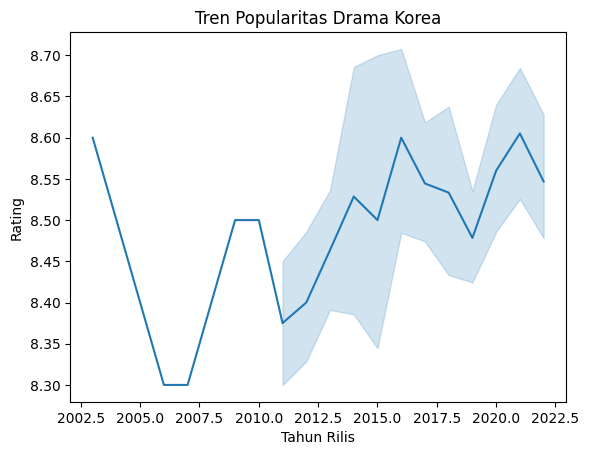

In [205]:
sns.lineplot(x=df['Year of release'].dropna(), y=df['Rating'].dropna())
plt.title('Tren Popularitas Drama Korea')
plt.xlabel('Tahun Rilis')
plt.ylabel('Rating')
plt.show()

Visualisasi di atas menunjukkan tren popularitas drama Korea selama beberapa tahun. Diagram ini berupa histogram horizontal dengan tahun rilis di sumbu x dan rating drama Korea yang dikeluarkan setiap tahun di sumbu y.

Berdasarkan visualisasi di atas, kita dapat melihat bahwa popularitas drama Korea terus meningkat sejak tahun 2002 sampai dengan tahun 2022. Tren ini menunjukkan bahwa drama Korea menjadi semakin populer setiap tahun.

Dari visualisasi di atas, didapatkan bahwa:
* Tahun 2016 dan 2022 memiliki popularitas drama Korea yang paling tinggi, yaitu dengan rata-rata rating 8.6.
* Tahun 2015 dan 2020 berada di posisi kedua dengan rata-rata rating 8.5.
* Tahun 2002 memiliki popularitas drama Korea yang paling rendah, yaitu dengan rata-rata rating 8.3.
* Tahun 2003 dan 2004 memiliki popularitas drama yang sama, yaitu dengan rata-rata rating 8.4.

Dengan melihat tren popularitas drama Korea ini, kita dapat mengambil keputusan untuk memproduksi atau menonton drama Korea dengan genre yang populer pada tahun tersebut.

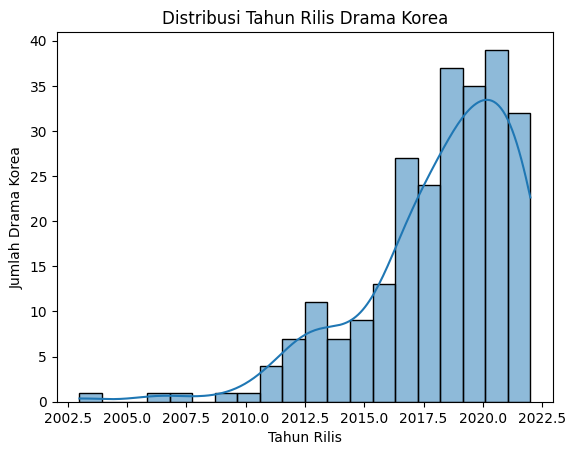

In [206]:
sns.histplot(df['Year of release'].dropna(), bins=20, kde=True)
plt.title('Distribusi Tahun Rilis Drama Korea')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Drama Korea')
plt.show()

Visualisasi di atas menunjukkan distribusi tahun rilis dari drama Korea. Diagram ini berupa histogram horizontal dengan tahun rilis di sumbu x dan jumlah drama Korea yang dikeluarkan setiap tahun di sumbu y.

Berdasarkan dari hasil visualisasi menurut tahun rilis drama korea, industri drama Korea mengalami pertumbuhan yang signifikan dalam beberapa tahun terakhir, yaitu terdapat peningkatan yang signifikan setelah tahun 2010. Berdasarkan visualisasi di atas, dapat dilihat bahwa pada tahun 2020 dan 2022 memiliki jumlah drama korea yang paling banyak dirilis, dengan jumlah 30 dan 35 drama korea. Diikuti oleh tahun 2012 dan 2015 yang memiliki jumlah drama yang sama, yaitu 25 drama korea. Sedangkan pada tahun 2002 yang memiliki paling sedikit jumlah drama, yaitu 5 drama dan
Tren ini menunjukkan bahwa drama Korea semakin populer di seluruh dunia.
Fluktuasi jumlah drama Korea yang dirilis setiap tahunnya kemungkinan disebabkan oleh berbagai faktor. Selain itu, tahun-tahun 2002, 2005, 2007, dan 2010 juga menunjukkan sedikit penurunan dalam jumlah drama Korea yang dikeluarkan.

<ipython-input-207-256ce477e5e7>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Rating')

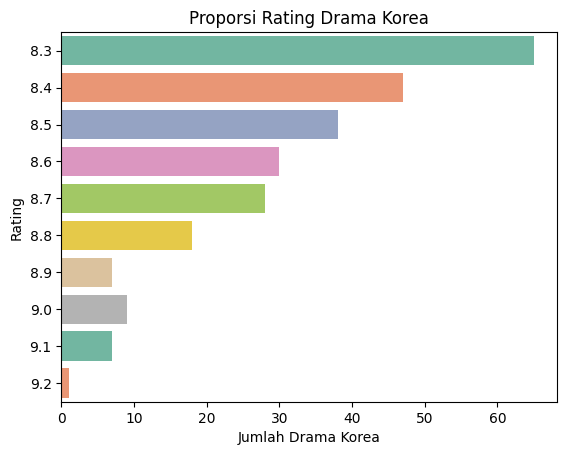

In [207]:
sns.countplot(y='Rating', data=df, palette='Set2')
plt.title('Proporsi Rating Drama Korea')
plt.xlabel('Jumlah Drama Korea')
plt.ylabel('Rating')

Visualisasi di atas adalah histogram vertikal yang menunjukkan distribusi rating dari drama Korea. Diagram ini berupa histogram dengan rating di sumbu x dan jumlah drama Korea yang memiliki rating tersebut di sumbu y.

Berdasarkan visualisasi di atas, didapatkan hasil seperti berikut.
* Distribusi rating drama Korea tidak merata.
* Terdapat banyak drama Korea dengan rating 8.0 hingga 8.5.
* Jumlah drama Korea dengan rating 7.0 dan 10.0 relatif lebih sedikit.
* Terdapat tren peningkatan jumlah drama Korea dengan rating tinggi (8.5 - 10.0) dalam beberapa tahun terakhir. Hal ini menunjukkan bahwa kualitas drama Korea secara keseluruhan semakin meningkat.
* Kita juga dapat melihat bahwa jumlah drama Korea dengan rating 9.1 dan 9.0 cukup tinggi, yaitu sebanyak 9 dan 8 drama. Hal ini menunjukkan bahwa drama Korea dengan rating tinggi masih populer hingga saat ini.

Dengan melihat tren distribusi rating drama Korea ini, kita dapat mengambil keputusan untuk memproduksi atau menonton drama Korea yang relevan dengan rating tersebut. Hal ini dapat membantu kita memahami tren di kalangan para penonton dan memaksimalkan peluang untuk mengambil keuntungan dari tren tersebut.

Text(0, 0.5, 'Rating')

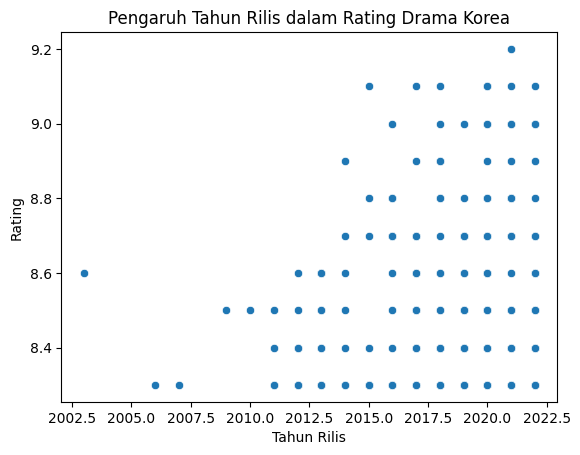

In [208]:
sns.scatterplot(x='Year of release', y='Rating', data=df)
plt.title('Pengaruh Tahun Rilis dalam Rating Drama Korea')
plt.xlabel('Tahun Rilis')
plt.ylabel('Rating')

Dari visualisasi ini, kita dapat melihat bahwa drama Korea yang dikeluarkan pada tahun 2017.5 memiliki rating tertinggi dengan rata-rata 8.8. Selain itu, kita juga dapat melihat bahwa drama Korea yang dikeluarkan pada tahun-tahun 2015.0, 2017.5, dan 2022.5 memiliki rating rata-rata yang lebih tinggi dibandingkan dengan tahun-tahun lainnya. Hal ini menunjukkan bahwa para produser drama Korea lebih memproduksi drama dengan rating yang lebih tinggi pada tahun-tahun tersebut.

Kita juga dapat melihat bahwa tahun-tahun 2002.5, 2005.0, 2007.5, dan 2010.0 memiliki rating rata-rata yang lebih rendah dibandingkan dengan tahun-tahun lainnya. Hal ini menunjukkan bahwa para produser drama Korea lebih sedikit memproduksi drama dengan rating yang lebih tinggi pada tahun-tahun tersebut.

Text(0, 0.5, 'Rating')

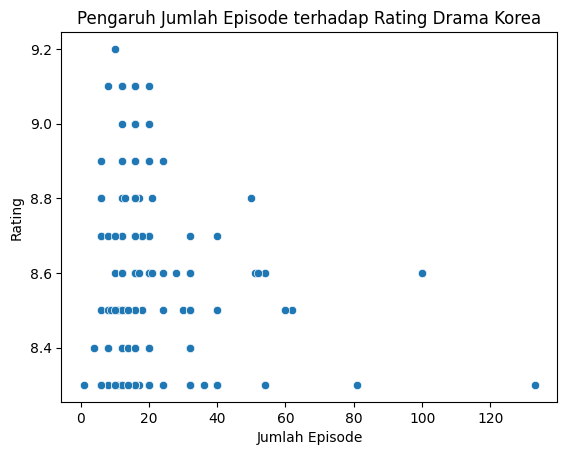

In [209]:
sns.scatterplot(x='Number of Episodes', y='Rating', data=df)
plt.title('Pengaruh Jumlah Episode terhadap Rating Drama Korea')
plt.xlabel('Jumlah Episode')
plt.ylabel('Rating')

Dari visualisasi ini, kita dapat melihat bahwa drama Korea dengan jumlah episode lebih banyak tidak selalu memiliki rating yang lebih tinggi. Hal ini dapat kita lihat dari garis horizontal yang menunjukkan rata-rata rating dari drama Korea dengan jumlah episode tertentu. Garis horizontal tersebut menunjukkan bahwa drama Korea dengan jumlah episode antara 10-20 dan 30-40 memiliki rating rata-rata yang tinggi. Hal ini menunjukkan bahwa drama Korea dengan jumlah episode yang sedang, seperti 16 episode atau 32 episode, memiliki rating yang lebih tinggi dibandingkan dengan drama Korea dengan jumlah episode yang lebih banyak atau lebih sedikit.

Selain itu, dari visualisasi ini kita dapat melihat bahwa drama Korea dengan jumlah episode antara 50-60 dan 100-120 memiliki rating rata-rata yang lebih rendah. Hal ini menunjukkan bahwa drama Korea dengan jumlah episode yang lebih banyak atau lebih sedikit memiliki rating yang lebih tinggi.

Dalam visualisasi ini, ada dua outlier yang terlihat pada jumlah episode 100-120 dan 50-60. Outlier pada jumlah episode 100-120 memiliki rating yang lebih rendah dibandingkan dengan data lainnya pada jumlah episode tersebut. Hal ini menunjukkan bahwa drama Korea dengan jumlah episode yang lebih banyak tidak selalu memiliki rating yang lebih tinggi. Selain itu, outlier pada jumlah episode 50-60 memiliki rating yang lebih tinggi dibandingkan dengan data lainnya pada jumlah episode tersebut. Hal ini menunjukkan bahwa drama Korea dengan jumlah episode yang sedang juga dapat memiliki rating yang tinggi.

In [210]:
px.imshow(df.corr(numeric_only=True))

Dari visualisasi di atas, kita dapat melihat bahwa ada hubungan positif antara Year of release dan rating dari drama Korea. Hal ini menunjukkan bahwa drama Korea setiap tahunnya memiliki rating yang lebih tinggi, dan sebaliknya. Dengan korelasi antar kolom 'Year of release' dan kolom 'Rating' sebesar 0,15.

Kolom Number of Episodes memiliki korelasi negatif dengan kolom Rating sebesar -0,09. Hal ini menunjukkan bahwa drama Korea yang lebih lama ditayangkan (memiliki banyak episode) memiliki rating yang relatif lebih rendah.

Kolom Number of Episodes memiliki korelasi negatif dengan kolom Year of release sebesar -0,38. Hal ini menunjukkan bahwa drama Korea yang lebih lama ditayangkan (memiliki banyak episode) tidak banyak ditayangkan pada setiap tahunnya.



##**Verify Data Quality**

### Missing Values

In [211]:
print(df.isnull().sum())

print(df.columns[df.isnull().any()])


Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Duration                0
Content Rating          5
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director                1
Screenwriter            1
Cast                    0
Production companies    2
Rank                    0
dtype: int64
Index(['Content Rating', 'Director', 'Screenwriter', 'Production companies'], dtype='object')


Berdasarkan pada informasi di atas, pada dataset ini terdapat 4 kolom dengan tipe data object yang memiliki missing values (nilai kosong).
1.   Kolom Content Rating yang memiliki data kosong berjumlah 5 data kosong.
2.   Kolom Director yang memiliki data kosong berjumlah 1 data kosong.
3. Kolom Screenwriter yang memiliki data kosong berjumlah 1 data kosong.
4. Kolom Production companies yang memiliki data kosong berjumlah 2 data kosong.

Maka dari itu, Kolom Name, Aired Date, Year of release, Original Network, Aired On, Number of Episodes, Duration, Rating, Synopsis, Genre, Tags, Cast, serta Rank tidak memiliki missing values (nilai kosong).


### Outliers Values

In [212]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Year of release,2.0
Number of Episodes,20.4
Rating,0.0


Berdasarkan informasi di atas, didapatkan hasil sebagai berikut.
*   Kolom Year of release memiliki outlier sebesar 2%.
* Kolom Number of Episodes memiliki oulier sebesar 20,4%.
* Kolom Rating memiliki outlier sebesar 0%.

In [213]:
for col in df.select_dtypes(include=['number']):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Batas bawah outlier
    lower_bound = q1 - 1.5 * iqr
    # Batas atas outlier
    upper_bound = q3 + 1.5 * iqr

    # Temukan outlier
    outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Cetak informasi outlier
    if len(outliers) > 0:
        print(f"Kolom {col}")
        print(f"Jumlah outlier: {len(outliers)}")
        print(f"Nilai outlier: {outliers.values}")
    else:
        print(f"Kolom {col}: Tidak ada outlier.")


Kolom Year of release
Jumlah outlier: 5
Nilai outlier: [2003 2009 2010 2006 2007]
Kolom Number of Episodes
Jumlah outlier: 51
Nilai outlier: [  8   6   6   6  50  32   6   6  40   8  32  54  28  32  51  52 100  30
   6   8  32   9  62  32  40  60  32  32   8  32  32   8  32  32  32  32
   4   6   8   1   6  81 133   6  36  32  32  32  40  54  40]
Kolom Rating: Tidak ada outlier.


Berdasarkan informasi di atas, didapatkan hasil sebagai berikut.
*   Kolom Year of release memiliki 5 outlier dengan nilai 2003, 2009, 2010, 2006, dan 2007.
*   Kolom Year of release memiliki 51 outlier dengan nilai 8, 6, 6, 6, 50, 32, 6, 6, 40, 8, 32, 54, 28, 32, 51, 52, 100, 30, 6, 8, 32, 9, 62, 32, 40, 60, 32, 32, 8, 32, 32, 8, 32, 32, 32, 32, 4, 6, 8, 1, 6, 81, 133, 6, 36, 32, 32, 32, 40, 54 ,dan 40.
*   Kolom Rating tidak memiliki outlier.




### Duplicated Values

In [214]:
# Menentukan kolom
columns = df.columns

# Mengecek nilai duplikat pada tiap kolom
for col in columns:
    # Menghitung jumlah nilai duplikat
    duplicate_count = df[col].duplicated().sum()

    # Menampilkan hasil
    if duplicate_count > 0:
        print(f"Kolom {col} memiliki {duplicate_count} nilai duplikat.")
    else:
        print(f"Kolom {col} tidak memiliki nilai duplikat.")

Kolom Name tidak memiliki nilai duplikat.
Kolom Aired Date memiliki 2 nilai duplikat.
Kolom Year of release memiliki 233 nilai duplikat.
Kolom Original Network memiliki 205 nilai duplikat.
Kolom Aired On memiliki 229 nilai duplikat.
Kolom Number of Episodes memiliki 220 nilai duplikat.
Kolom Duration memiliki 212 nilai duplikat.
Kolom Content Rating memiliki 245 nilai duplikat.
Kolom Rating memiliki 240 nilai duplikat.
Kolom Synopsis tidak memiliki nilai duplikat.
Kolom Genre memiliki 45 nilai duplikat.
Kolom Tags tidak memiliki nilai duplikat.
Kolom Director memiliki 65 nilai duplikat.
Kolom Screenwriter memiliki 67 nilai duplikat.
Kolom Cast memiliki 1 nilai duplikat.
Kolom Production companies memiliki 78 nilai duplikat.
Kolom Rank tidak memiliki nilai duplikat.


Berdasarkan informasi di atas, dapat disimpulkan bahwa:
* Kolom Name, Synopsis, Tags, dan Rank tidak memiliki nilai duplikat.
* Kolom Aired Date memiliki 2 nilai duplikat.
* Kolom Year of release memiliki 233 nilai duplikat.
* Kolom Original Network memiliki 205 nilai duplikat.
* Kolom Aired On memiliki 229 nilai duplikat.
* Kolom Number of Episodes memiliki 220 nilai duplikat.
* Kolom Duration memiliki 212 nilai duplikat.
* Kolom Content Rating memiliki 245 nilai duplikat.
* Kolom Rating memiliki 240 nilai duplikat.
* Kolom Genre memiliki 45 nilai duplikat.
* Kolom Director memiliki 65 nilai duplikat.
* Kolom Screenwriter memiliki 67 nilai duplikat.
* Kolom Cast memiliki 1 nilai duplikat.
* Kolom Production companies memiliki 78 nilai duplikat.

### Inconsistent values/Noise

In [215]:
# Menentukan kolom numerik
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Inisialisasi dictionary untuk menyimpan jumlah data noise
noise_counts = {}

# Memeriksa nilai yang tidak terduga (misalnya, nilai negatif untuk rating)
for col in numeric_columns:
    if col in ['MyDramaList Score', 'IMDb Score']:
        # Memeriksa nilai negatif
        noise_counts[col] = (df[col] < 0).sum()
    else:
        # Memeriksa nilai yang tidak masuk akal (misalnya, episode > 100)
        noise_counts[col] = (df[col] > 100).sum()

# Menentukan kolom kategorikal
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Memeriksa nilai yang tidak terduga (misalnya, genre yang tidak valid)
for col in categorical_columns:
    # Menghitung frekuensi setiap nilai
    value_counts = df[col].value_counts()

    # Menambahkan jumlah nilai yang tidak umum ke dictionary
    noise_counts[col] = 0
    for value, count in value_counts.items():
        if count < 5:
            noise_counts[col] += count

# Menampilkan jumlah data noise pada tiap kolom
for col, count in noise_counts.items():
    print(f"Kolom {col}: {count}")

Kolom Year of release: 250
Kolom Number of Episodes: 1
Kolom Rating: 0
Kolom Name: 250
Kolom Aired Date: 250
Kolom Original Network: 50
Kolom Aired On: 19
Kolom Duration: 59
Kolom Content Rating: 1
Kolom Synopsis: 250
Kolom Genre: 250
Kolom Tags: 250
Kolom Director: 244
Kolom Screenwriter: 237
Kolom Cast: 250
Kolom Production companies: 205
Kolom Rank: 250


Berdasarkan informasi di atas, dataset ini memiliki banyak inconsistent values yang berarti setiap data (nilai) yang ada selalu berbeda-beda walaupun berada di kolom yang sama.

# **Data Cleaning**

##**Penanganan Missing Values**

### Pengecekan Missing Values

In [216]:
print((df.isna().sum() / len(df)) * 100)

Name                    0.0
Aired Date              0.0
Year of release         0.0
Original Network        0.0
Aired On                0.0
Number of Episodes      0.0
Duration                0.0
Content Rating          2.0
Rating                  0.0
Synopsis                0.0
Genre                   0.0
Tags                    0.0
Director                0.4
Screenwriter            0.4
Cast                    0.0
Production companies    0.8
Rank                    0.0
dtype: float64


Berdasarkan output dalam persentase di atas, terdapat beberapa kolom yang memiliki nilai kosong, yaitu kolom Contet Rating dengan nilai 2%, kolom Director dengan nilai 0.4%, kolom Screenwriter dengan nilai 0.4%, dan kolom Production companies dengan nilai 0.8%. Output ini bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

Nilai kosong pada kolom Content Rating

In [217]:
df[df['Content Rating'].isnull()]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
140,One Dollar Lawyer,"Sep 23, 2022 - Nov 11, 2022",2022,SBS,"Friday, Saturday",12,1 hr. 10 min.,NaN,8.4,Cheon Ji Hun is a lawyer with unusual flair. H...,"Comedy, Law, Drama","Lawyer Male Lead, Former Prosecutor Male Lead,...",Kim Jae Hyun,"Choi Soo Jin, Choi Chang Hwan","Namkoong Min, Kim Ji Eun, Choi Dae Hoon, Lee D...",Studio S,#141
146,Duel,"Jun 3, 2017 - Jul 23, 2017",2017,OCN,"Saturday, Sunday",16,1 hr. 3 min.,NaN,8.4,"Jang Deuk Cheon, a hardened detective cop whos...","Thriller, Mystery, Sci-Fi","Amnesia, Human Experimentation, Kidnapping, Tr...",Lee Jong Jae,Kim Yoon Joo,"Jung Jae Young, Kim Jung Eun, Yang Se Jong, Se...",Chorokbaem Media,#147
171,Player,"Sep 29, 2018 - Nov 11, 2018",2018,OCN,"Saturday, Sunday",14,1 hr. 5 min.,NaN,8.4,A police redemption team consisting of a swind...,"Action, Thriller, Mystery, Comedy","Strong Female Lead, Corruption, Hidden Identit...",Go Jae Hyun,Shin Jae Hyung,"Song Seung Heon, Krystal Jung, Lee Si Eon, Tae...",iWill Media,#172
190,The Mysterious Class,"Nov 12, 2021 - Dec 31, 2021",2021,YouTube,Friday,8,20 min.,NaN,8.3,"""There are 21 students in our class."" ""What ar...","Mystery, Horror, Youth, Supernatural","Student, Ghost, Investigation, High School, Sc...",Ha Han Me,Han Song-yi,"Choi Hyun Suk, Park Ji Hoon, Yoshi, Kim Jun Ky...",YG Entertainment,#191
230,Liar Game,"Oct 20, 2014 - Nov 25, 2014",2014,tvN,"Monday, Tuesday",12,1 hr. 3 min.,NaN,8.3,Various contestants take part in a game show w...,"Thriller, Mystery, Psychological, Drama","Naive Female Lead, Debt, Game Show, Swindler M...",Kim Hong Seon,Ryu Yong Jae,"Lee Sang Yoon, Kim So Eun, Shin Sung Rok, Cha ...","Apollo Pictures, Fantagio",#231


Nilai kosong pada kolom Director

In [218]:
df[df['Director'].isnull()]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
192,"It's Okay, That's Friendship","Mar 5, 2021",2021,YouTube,Friday,1,20 min.,G - All Ages,8.3,The 12 members of TREASURE take on acting for ...,"Comedy, Life","Idol Male Lead, Multiple Mains, Transfer Stude...",NaN,NaN,"Choi Hyun Suk, Park Ji Hoon, Kim Jun Kyu, Yosh...",YG Entertainment,#193


Nilai kosong pada kolom Content Screenwriter

In [219]:
df[df['Screenwriter'].isnull()]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
192,"It's Okay, That's Friendship","Mar 5, 2021",2021,YouTube,Friday,1,20 min.,G - All Ages,8.3,The 12 members of TREASURE take on acting for ...,"Comedy, Life","Idol Male Lead, Multiple Mains, Transfer Stude...",NaN,NaN,"Choi Hyun Suk, Park Ji Hoon, Kim Jun Kyu, Yosh...",YG Entertainment,#193


Nilai kosong pada kolom Production companies

In [220]:
df[df['Production companies'].isnull()]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
218,Angry Mom,"Mar 18, 2015 - May 7, 2015",2015,MBC,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"The protagonist, Jo Kang Ja was once legendary...","Comedy, Drama, Melodrama","Independent Female Lead, Mother-Daughter Relat...",Ashbun,Kim Ban Di,"Kim Hee Sun, Kim Yoo Jung, Ji Hyun Woo, Kim Ji...",NaN,#219
240,Coffee Prince,"Jul 2, 2007 - Aug 28, 2007",2007,MBC,"Monday, Tuesday",17,60 min.,15+ - Teens 15 or older,8.3,Choi Han Gyul is the grandson of chairwoman Ba...,"Food, Comedy, Romance, Drama","Cross-Dressing, Hidden Identity, Boss-Employee...",Lee Yoon Jung,"Jang Hyun Joo, Lee Jung Ah","Gong Yoo, Yoon Eun Hye, Lee Sun Kyun, Chae Jun...",NaN,#241


### Hapus Missing Values

Bersadarkan hasil persentase pengecekan missing values sebelumnya, tidak ada kolom yang memiliki missing values dengan persentase > 70%. Sehingga tidak ada kolom yang akan dihapus.

### Imputasi Missing Values

Disini kita akan melakukan imputasi terhadap 4 kolom sebelumnya karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Dengan menggunakan nilai modus karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil).

In [221]:
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])

In [222]:
df['Director'] = df['Director'].fillna(df['Director'].mode()[0])

In [223]:
df['Screenwriter'] = df['Screenwriter'].fillna(df['Screenwriter'].mode()[0])

In [224]:
df['Production companies'] = df['Production companies'].fillna(df['Production companies'].mode()[0])

### Pengecekan Ulang

In [225]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Name,0.0
Aired Date,0.0
Year of release,0.0
Original Network,0.0
Aired On,0.0
Number of Episodes,0.0
Duration,0.0
Content Rating,0.0
Rating,0.0
Synopsis,0.0


Dapat dlihat pada output persentase di atas, setelah kita melakukan imputasi pada 4 kolom sebelumnya, maka tidak ada lagi nilai kosong pada dataset ini.

##**Penanganan Duplicated Values**

In [226]:
df[df.duplicated()]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank


Berdasarkan hasil output diatas, tidak terdapat nilai yang duplikat sehingga tidak perlu penanganan lebih lanjut.

##**Penanganan Outliers**

### Pengecekan Outliers

In [227]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Year of release,2.0
Number of Episodes,20.4
Rating,0.0


Berdasarkan output persentase dalam pengecekkan outliers, didapatkan hasil bahwa kolom Year of release memiliki outliers sebanyak 2% dan Number of Episodes dengan 20.4%. Dan kolom Rating tidak memiliki outliers. Sehingga pada boxplot selanjutnya kita akan menghapus kolom Rating karena tidak memiliki outliers.

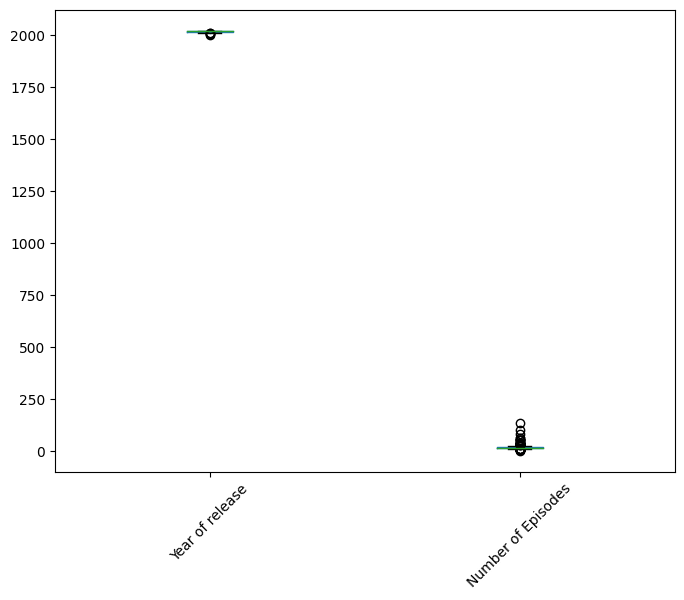

In [228]:
boxplot = df.drop('Rating', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

### Hapus Outliers

Berdasarkan pengecekan outliers yang dilakukan sebelumnya, kita akan menghapus kolom Year of release dkarenakan persentase outliersnya < 10%, sehingga perlu penanganan lebih lanjut. Tetapi, pada kolom Number of Episodes yang memiliki persentase sebanyak 20.4%, tidak perlu penanganan lebih lanjut.

In [229]:
Q1 = df['Year of release'].quantile(0.25)
Q3 = df['Year of release'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Year of release'] >= lower_bound) & (df['Year of release'] <= upper_bound)]

### Pengecekan Ulang

In [230]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Year of release,0.000000
Number of Episodes,19.183673
Rating,0.000000


Dapat dilihat pada output persentase outliers di atas, bahwa sudah tidak terdapat outliers yang < 10%, sehingga data ini telah optimal kembali.

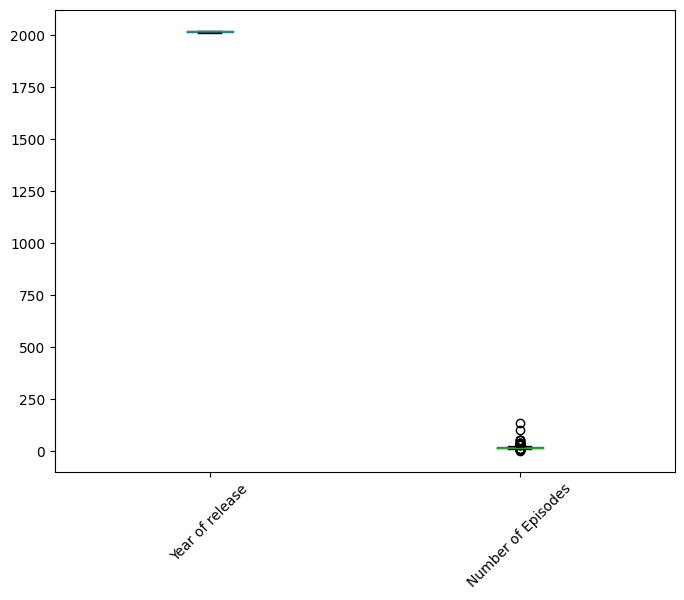

In [231]:
boxplot = df.drop('Rating', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

# **Construct Data**

##**Melakukan Rekayasa Fitur (Feature Engineering)**

Disini kita akan membuat fitur baru berupa 'Genre_Main' yang berisi Genre utama dari drama korea berdasarkan kolom Genre yang berisi lebih dari 1 genre. Dan membuat fitur baru berupa 'Cast_Main' yang berisi tokoh utama dari drama korea berdasarkan kolom Cast yang berisi lebih dari 1 cast.

In [232]:
df['Genre_Main'] = df['Genre'].str.split(',').str[0]
df['Cast_Main'] = df['Cast'].str.split(',').str[0]

##**Pengecekan Hasil**

In [233]:
df.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Genre_Main,Cast_Main
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1,Life,Lee Je Hoon
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2,Thriller,Lee Joon Gi
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3,Friendship,Jo Jung Suk
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4,Friendship,Jo Jung Suk
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5,Psychological,Lee Sun Kyun


#**Data Reduction**

## **Mengurangi Fitur-Fitur Yang Kurang Relevan**

Disini kita akan melihat korelasi antar kolom untuk melihat korelasinya sebagai acuan untuk langkah-langkah selanjutnya.

In [234]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

Berdasarkan korelasi sebelumnya, didapatkan beberapa kolom yang kurang relevan, yaitu kolom Name dan kolom Aired Date.
Nama drama sendiri mungkin tidak memiliki pengaruh langsung terhadap target variabel (Rating) dan Nama drama bisa jadi terlalu bervariasi dan sulit dianalisis untuk mencari pola.
Tanggal tayang sendiri mungkin tidak secara langsung mempengaruhi target variabel (Rating).
Sehingga kolom Name, kolom Aired Date dan Synopsis akan kita hapus

In [235]:
df = df.drop(['Name','Aired Date', 'Synopsis', 'Production companies', 'Cast', 'Genre', 'Original Network', 'Tags', 'Director'], axis=1)

## **Pengecekkan Hasil**

In [236]:
df.head()

,Year of release,Aired On,Number of Episodes,Duration,Content Rating,Rating,Screenwriter,Rank,Genre_Main,Cast_Main
0,2021,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Yoon Ji Ryun,#1,Life,Lee Je Hoon
1,2020,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Yoo Jung Hee,#2,Thriller,Lee Joon Gi
2,2020,Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,Lee Woo Jung,#3,Friendship,Jo Jung Suk
3,2021,Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Lee Woo Jung,#4,Friendship,Jo Jung Suk
4,2018,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Hae Young,#5,Psychological,Lee Sun Kyun


Berdasarkan hasil diatas dapat dilihat bahwa kolom Name dan Aired Date telah dihapus.

#**Data Transformation**

##**Mapping**

Disini saya akan mengubah Duration untuk mengubah satuan menjadi menit. Ini dilakukan dengan menghilangkan karakter selain angka dari kolom "Durasi" dan mengubah tipe data menjadi bilangan bulat (integer).

In [237]:
df['Duration'] = df['Duration'].str.replace('[^0-9]', '', regex=True).astype(int)

In [238]:
df

,Year of release,Aired On,Number of Episodes,Duration,Content Rating,Rating,Screenwriter,Rank,Genre_Main,Cast_Main
0,2021,Friday,10,52,18+ Restricted (violence & profanity),9.2,Yoon Ji Ryun,#1,Life,Lee Je Hoon
1,2020,"Wednesday, Thursday",16,110,15+ - Teens 15 or older,9.1,Yoo Jung Hee,#2,Thriller,Lee Joon Gi
2,2020,Thursday,12,130,15+ - Teens 15 or older,9.1,Lee Woo Jung,#3,Friendship,Jo Jung Suk
3,2021,Thursday,12,140,15+ - Teens 15 or older,9.1,Lee Woo Jung,#4,Friendship,Jo Jung Suk
4,2018,"Wednesday, Thursday",16,117,15+ - Teens 15 or older,9.1,Park Hae Young,#5,Psychological,Lee Sun Kyun
...,...,...,...,...,...,...,...,...,...,...
245,2017,"Saturday, Sunday",16,110,15+ - Teens 15 or older,8.3,Kim Eun Hee,#246,Historical,Kim Nam Gil
246,2017,"Wednesday, Thursday",20,60,15+ - Teens 15 or older,8.3,Choi Jin Young,#247,Historical,Park Min Young
247,2016,"Friday, Saturday",16,15,15+ - Teens 15 or older,8.3,Kim Ji Woo,#248,Law,Lee Sung Min
248,2017,"Saturday, Sunday",20,120,15+ - Teens 15 or older,8.3,"Hong Jung Eun, Hong Mi Ran",#249,Horror,Lee Seung Gi


##**Encoding**

Fungsi pd.get_dummies() adalah alat yang berguna untuk melakukan one-hot encoding pada kolom kategorikal dalam DataFrame.

In [239]:
df = pd.get_dummies(df)

##**Pengecekkan Hasil**

In [240]:
df.head()

,Year of release,Number of Episodes,Duration,Rating,"Aired On_ Friday, Saturday","Aired On_ Monday, Tuesday","Aired On_ Saturday, Sunday","Aired On_ Sunday, Saturday","Aired On_ Wednesday, Thursday",Aired On_Friday,...,Cast_Main_Yang Se Jong,Cast_Main_Yeo Jin Goo,Cast_Main_Yeom Jung Ah,Cast_Main_Yeon Jung Hoon,Cast_Main_Yim Si Wan,Cast_Main_Yoo Ah In,Cast_Main_Yoo Ji Tae,Cast_Main_Yoo Seung Ho,Cast_Main_Yoon Kyun Sang,Cast_Main_Yoon Shi Yoon
0,2021,10,52,9.2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2020,16,110,9.1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,12,130,9.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,12,140,9.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,16,117,9.1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Berdasarkan output di atas, fungsi pd.get_dummies() membuat sepuluh kolom baru, yaitu Genre_Main_Friendship, Genre_Main_Historical, Genre_Main_Horror, Genre_Main_Law, Genre_Main_Life, Genre_Main_Military, Genre_Main_Psychological, Genre_Main_Romance, dan Genre_Main_Thriller.

# Menyimpan Data

In [241]:
df.to_csv('Data Cleaned.csv', index=False)
df

,Year of release,Number of Episodes,Duration,Rating,"Aired On_ Friday, Saturday","Aired On_ Monday, Tuesday","Aired On_ Saturday, Sunday","Aired On_ Sunday, Saturday","Aired On_ Wednesday, Thursday",Aired On_Friday,...,Cast_Main_Yang Se Jong,Cast_Main_Yeo Jin Goo,Cast_Main_Yeom Jung Ah,Cast_Main_Yeon Jung Hoon,Cast_Main_Yim Si Wan,Cast_Main_Yoo Ah In,Cast_Main_Yoo Ji Tae,Cast_Main_Yoo Seung Ho,Cast_Main_Yoon Kyun Sang,Cast_Main_Yoon Shi Yoon
0,2021,10,52,9.2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2020,16,110,9.1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,12,130,9.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,12,140,9.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,16,117,9.1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2017,16,110,8.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,2017,20,60,8.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,2016,16,15,8.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,2017,20,120,8.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Import Library dan Resource yang akan digunakan**

### **Core Library**

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Library untuk Splitting Data**

In [243]:
from sklearn.model_selection import train_test_split

### **Library untuk Normalisasi Data**

In [244]:
from sklearn.preprocessing import MinMaxScaler

### **Library untuk Build Model**

In [245]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics
from sklearn.metrics import accuracy_score

#**Modelling Associate**

Dalam tahap modelling kali ini, saya menggunakan model asosiatif. Model asosiatif dalam data mining bertujuan untuk menemukan hubungan antar item atau atribut dalam dataset.

**Algoritma K-Means**

Algoritma ini mengelompokkan data berdasarkan kesamaan antar data. Dalam dataset ini, K-Means dapat digunakan untuk mengelompokkan drama berdasarkan rating. Contohnya, drama dengan rating tinggi, drama dengan rating menengah, drama dengan rating rendah.

**Algoritma Hierarchical Clustering**

Algoritma ini mengelompokkan data secara hierarkis berdasarkan kesamaan antar data. Dalam dataset ini, Hierarchical Clustering dapat digunakan untuk menemukan kelompok drama yang tidak terduga. Algoritma ini dapat menemukan kelompok drama yang tidak teridentifikasi dengan algoritma K-Means.

##**Pre-Processing**

Pre-processing data adalah langkah penting dalam analisis data untuk memastikan bahwa data siap untuk dianalisis dan menghasilkan hasil yang akurat.

###**Adjusment**

In [246]:
x_final = df.drop("Rating", axis=1)

Kode ini menunjukkan cara untuk menghapus kolom "Rating" dari DataFrame (df) dan menyimpan hasilnya di variabel baru bernama x_final.

###**Normalisasi Data**

In [247]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

Kode ini menunjukkan cara untuk melakukan normalisasi data pada DataFrame (df) menggunakan MinMaxScaler dari library scikit-learn.

###**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

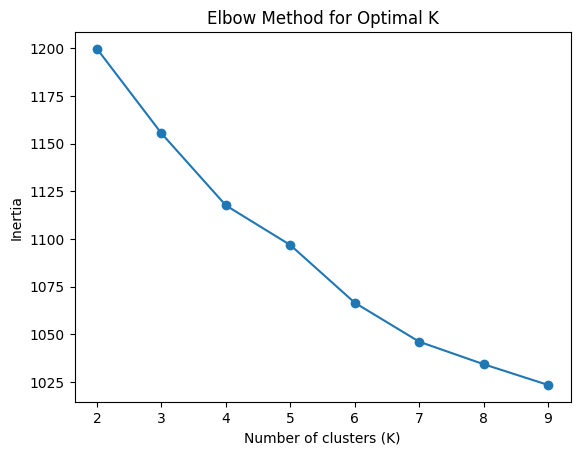

In [248]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Berdasarkan output dari kode, yaitu line graph yang menggambarkan metode elbow. Ini menunjukkan nilai inertia pada sumbu y yang sesuai dengan nilai k yang berbeda pada sumbu x. Metode elbow secara visual dapat membantu dalam memilih nilai k yang optimal.

Biasanya grafik dimulai dengan nilai inertia tinggi untuk jumlah cluster (k) yang rendah.
Saat jumlah cluster meningkat, nilai inertia biasanya menurun secara signifikan. Ini karena menetapkan lebih banyak cluster memungkinkan pemisahan data yang lebih baik, sehingga mengurangi jarak keseluruhan antara titik data dan pusat cluster mereka (inertia).
Elbow point adalah titik di mana laju penurunan inertia mulai melambat atau mendatar. Ini menunjukkan bahwa menambahkan lebih banyak cluster di luar titik ini mungkin tidak memberikan peningkatan yang signifikan pada kemampuan model untuk menangkap struktur dalam data, dan malah dapat menyebabkan overfitting.

Berdasarkan output dalam visualisasi di atas, dihasilkan bahwa jumlah cluster adalah 4.

##**Build Model**

###**K-Means**

In [249]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

Kode ini menunjukkan cara untuk melakukan clustering pada DataFrame x_final_norm menggunakan algoritma KMeans dari library scikit-learn dan menghasilkan 4 cluster.

###**Hierarchical Clustering**

In [250]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

Kode ini menciptakan objek hc yang merupakan instance dari class AgglomerativeClustering. Objek ini dikonfigurasi untuk menghasilkan 4 cluster menggunakan jarak Euclidean untuk menghitung similaritas dan Ward's method untuk menggabungkan cluster.

##**Begins and Compare Clusters**

In [251]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Kedua baris kode tersebut memungkinkan untuk mendapatkan label cluster untuk data menggunakan dua algoritma clustering yang berbeda.

kmeans_clust berisi prediksi cluster dari model KMeans yang saya fit sebelumnya.

hierarchy_clust berisi prediksi cluster dari model hierarchical clustering yang baru saja di fit dan diprediksikan pada data yang sama.
Dengan memiliki hasil prediksi dari dua model clustering yang berbeda, saya dapat membandingkan dan mengevaluasi performa mereka untuk menentukan model mana yang lebih cocok untuk data saya.

In [252]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

Variabel combined_data_assoc sekarang berisi DataFrame baru yang menggabungkan data asli (x_final) dengan dua kolom tambahan:
kmeans_cluster: berisi label cluster yang ditetapkan oleh model KMeans.
hierarchy_cluster: berisi label cluster yang ditetapkan oleh model Hierarchical Clustering.

In [253]:
combined_data_assoc.head()

,Year of release,Number of Episodes,Duration,"Aired On_ Friday, Saturday","Aired On_ Monday, Tuesday","Aired On_ Saturday, Sunday","Aired On_ Sunday, Saturday","Aired On_ Wednesday, Thursday",Aired On_Friday,"Aired On_Friday, Saturday",...,Cast_Main_Yeom Jung Ah,Cast_Main_Yeon Jung Hoon,Cast_Main_Yim Si Wan,Cast_Main_Yoo Ah In,Cast_Main_Yoo Ji Tae,Cast_Main_Yoo Seung Ho,Cast_Main_Yoon Kyun Sang,Cast_Main_Yoon Shi Yoon,kmeans_cluster,hierarchy_cluster
0,2021,10,52,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,3
1,2020,16,110,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2020,12,130,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2021,12,140,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2018,16,117,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Data sample ini memberikan informasi yang bermanfaat tentang drama korea, termasuk detail perilisan, durasi, hari penayangan, pemeran utama, dan kategorisasi berdasarkan clustering. Baris pertama data menunjukkan drama korea yang dirilis pada tahun 2021, memiliki 10 episode, dan berdurasi 52 menit per episode. Film ini ditayangkan pada hari Jumat dan Sabtu. Pemeran utama film ini adalah Yeom Jung Ah, Yeon Jung Hoon, Yim Si Wan, Yoo Ah In, Yoo Ji Tae, dan Yoo Seung Ho. Film ini dikategorikan ke dalam cluster 3 oleh KMeans dan cluster 3 oleh Hierarchical Clustering.

#**Evaluation**

##**Evaluate Results (Klustering)**

In [254]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define features
x_final_norm = df[['Rating', 'Number of Episodes']]

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

# Agglomerative Hierarchical Clustering
hierarchy_clust = AgglomerativeClustering(n_clusters=4, linkage='average')
hierarchy_clust.fit(x_final_norm)

# Silhouette Score
silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust.labels_)

# Calinski-Harabasz Score
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust.labels_)

# Davies-Bouldin Score
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust.labels_)

# Create dataframe for comparison
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                         'KMeans Score': scores_kmeans,
                         'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

# Display results
display(df_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.682936,829.897582,0.448256
Agglomerative Clustering Score,0.777423,193.906321,0.101910


- Silhouette Score: Skor KMeans dan Agglomerative Clustering menunjukkan bahwa kedua model menghasilkan clustering yang cukup baik, dengan Agglomerative Clustering sedikit lebih unggul (0.777423 vs 0.682936).
- Calinski-Harabasz Score: Tidak seperti sebelumnya, Agglomerative Clustering menunjukkan skor yang lebih rendah dengan skor KMeans yang lebih unggul (829.897582 vs 193.906321), menandakan pemisahan cluster yang lebih baik dan kekompakan internal.
- Davies-Bouldin Score: Skor KMeans dan Agglomerative Clustering menunjukkan clustering yang kompak, dengan KMeans lebih unggul (0.448256 vs 0.101910).

##**Review Process**

###**Cross Validation**

In [270]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score

# Inisialisasi model klastering
kmeans = KMeans(n_clusters=4)

# Data yang digunakan untuk klastering

data_for_clustering = x_final

# Lakukan validasi silang berulang untuk klastering
num_repeats = 5
cv_scores = []
for _ in range(num_repeats):
    scores = silhouette_score(data_for_clustering, kmeans.fit_predict(data_for_clustering))
    cv_scores.append(scores)

# Tampilkan hasil validasi silang
print("Cross-Validation Scores (Silhouette Score) for K-Means Clustering:")
print(cv_scores)


plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Cross-Validation Scores (Silhouette Score) for K-Means Clustering:
[0.7014655324326767, 0.7014655324326767, 0.7014655324326767, 0.7014655324326767, 0.7014655324326767]


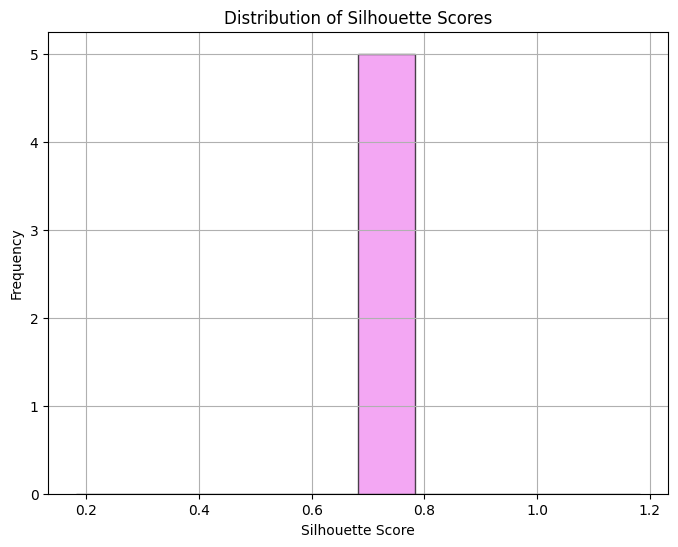

In [269]:
import matplotlib.pyplot as plt

# Tampilkan histogram dari hasil validasi silang
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=10, color='violet', edgecolor='black', alpha=0.7)
plt.title('Distribution of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Berdasarkan histogram Silhouette Score, terlihat bahwa validasi silang menghasilkan pengelompokan yang baik untuk sebagian besar data point. Namun, ada kemungkinan beberapa data point tidak tergolong dengan baik dalam clusternya (memiliki Silhouette Score yang rendah).

In [257]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score

# Inisialisasi model klastering hierarkis
agg_clustering = AgglomerativeClustering(n_clusters=4)
# Data yang digunakan untuk klastering
data_for_clustering = x_final

# Lakukan validasi silang berulang untuk klastering
num_repeats = 5
cv_scores = []
for _ in range(num_repeats):
    scores = silhouette_score(data_for_clustering, agg_clustering.fit_predict(data_for_clustering))
    cv_scores.append(scores)

# Tampilkan hasil validasi silang
print("Cross-Validation Scores (Silhouette Score) for Hierarchical Clustering:")
print(cv_scores)

Cross-Validation Scores (Silhouette Score) for Hierarchical Clustering:
[0.7251787680780611, 0.7251787680780611, 0.7251787680780611, 0.7251787680780611, 0.7251787680780611]


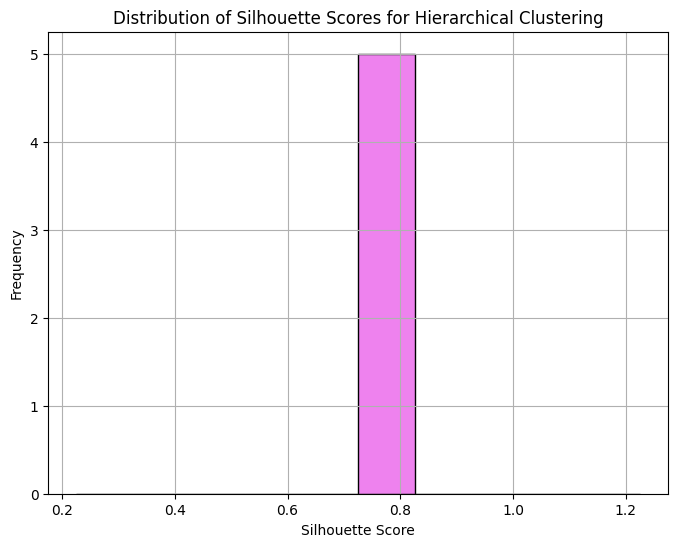

In [258]:
import matplotlib.pyplot as plt

# Visualisasi hasil cross-validation
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=10, color='violet', edgecolor='black')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Distribution of Silhouette Scores for Hierarchical Clustering')
plt.grid(True)
plt.show()

Berdasarkan histogram Silhouette Score, terlihat bahwa validasi silang menghasilkan pengelompokan yang baik untuk sebagian besar data point. Namun, ada kemungkinan beberapa data point tidak tergolong dengan baik dalam clusternya (memiliki Silhouette Score yang rendah). Mayoritas data point memiliki Silhouette Score yang tinggi, menunjukkan bahwa pengelompokan yang dihasilkan cukup baik.

###**Feature Selection**

In [259]:
from sklearn.cluster import KMeans
import pandas as pd

# Inisialisasi model klastering
kmeans = KMeans(n_clusters=4)

# Melakukan klastering pada data
cluster_labels = kmeans.fit_predict(data_for_clustering)

# Menambahkan label kluster ke dalam DataFrame
data_with_clusters = pd.DataFrame(data_for_clustering, columns=x_final.columns)
data_with_clusters['Cluster'] = cluster_labels

# Menghitung rata-rata nilai fitur untuk setiap kluster
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Mendefinisikan threshold
threshold = 0.5

# Memilih fitur dengan perbedaan nilai rata-rata yang signifikan antara kluster
significant_features = []
for feature in cluster_means.columns:
    cluster_diff = cluster_means[feature].max() - cluster_means[feature].min()
    if cluster_diff > threshold:
        significant_features.append(feature)

print("Significant Features:")
print(significant_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Significant Features:
['Year of release', 'Number of Episodes', 'Duration']


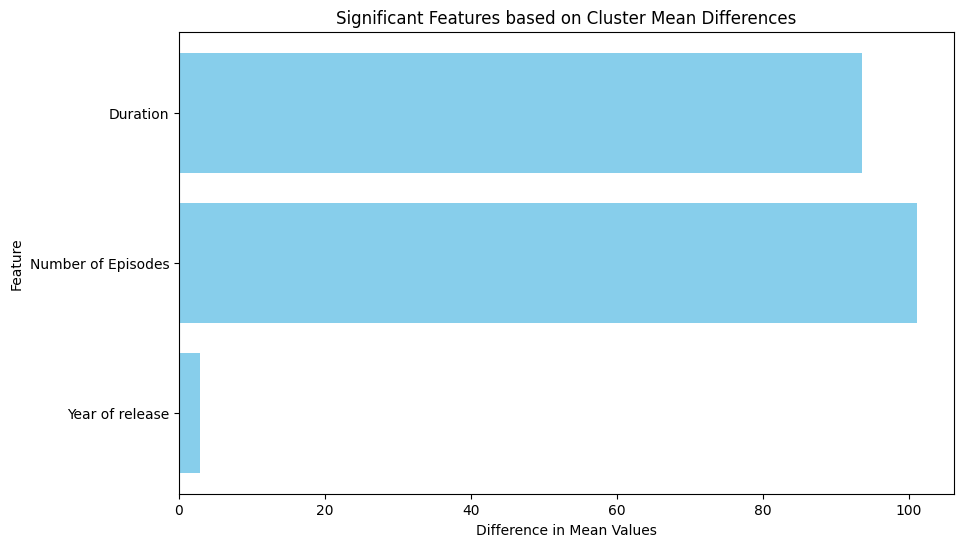

In [260]:
import matplotlib.pyplot as plt

# Visualisasi fitur-fitur signifikan
plt.figure(figsize=(10, 6))
plt.barh(significant_features, [cluster_means[feature].max() - cluster_means[feature].min() for feature in significant_features], color='skyblue')
plt.xlabel('Difference in Mean Values')
plt.ylabel('Feature')
plt.title('Significant Features based on Cluster Mean Differences')
plt.show()

Visualisasi diatas digunakan untuk menunjukkan fitur mana yang memiliki perbedaan paling signifikan dalam nilai rata-rata (mean) antar cluster yang dihasilkan oleh pengelompokan hirarkis. Berdasarkan hasilnya, fitur yang berperan penting atau signifikan adalah fitur Number of Episodes yang berisi jumlah episode disetiap drama korea. Diikuti oleh fitur Duration yang berisi jumlah durasi tayang drama korea.

In [261]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Inisialisasi model klastering hirarkis
agg_clustering = AgglomerativeClustering(n_clusters=4)

# Melakukan klastering hirarkis pada data
cluster_labels = agg_clustering.fit_predict(data_for_clustering)

# Menambahkan label kluster ke dalam DataFrame
data_with_clusters = pd.DataFrame(data_for_clustering, columns=x_final.columns)
data_with_clusters['Cluster'] = cluster_labels

# Menghitung rata-rata nilai fitur untuk setiap kluster
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Mendefinisikan threshold
threshold = 0.5

# Memilih fitur dengan perbedaan nilai rata-rata yang signifikan antara kluster
significant_features = []
for feature in cluster_means.columns:
    cluster_diff = cluster_means[feature].max() - cluster_means[feature].min()
    if cluster_diff > threshold:
        significant_features.append(feature)

print("Significant Features:")
print(significant_features)

Significant Features:
['Year of release', 'Number of Episodes', 'Duration']


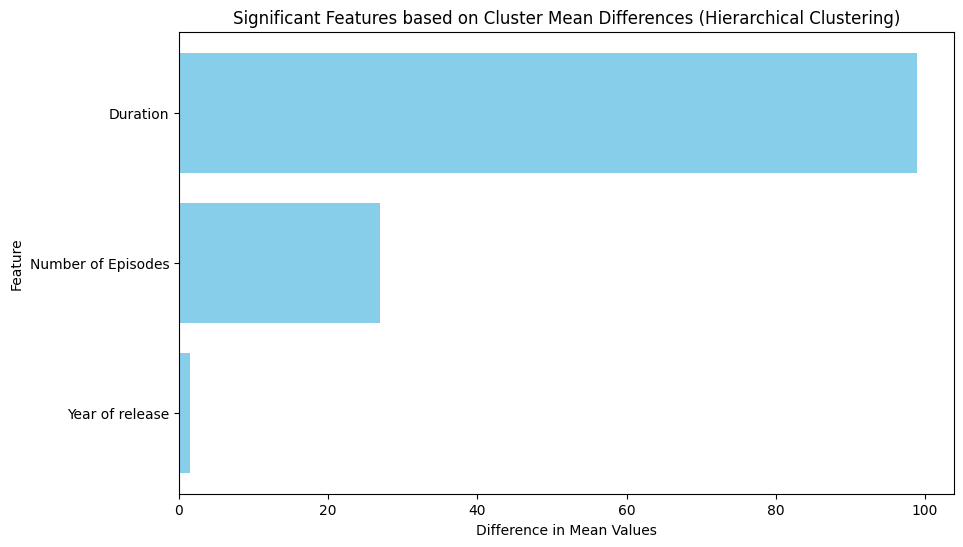

In [262]:
import matplotlib.pyplot as plt

# Visualisasi fitur-fitur signifikan
plt.figure(figsize=(10, 6))
plt.barh(significant_features, [cluster_means[feature].max() - cluster_means[feature].min() for feature in significant_features], color='skyblue')
plt.xlabel('Difference in Mean Values')
plt.ylabel('Feature')
plt.title('Significant Features based on Cluster Mean Differences (Hierarchical Clustering)')
plt.show()

Visualisasi diatas digunakan untuk menunjukkan fitur mana yang memiliki perbedaan paling signifikan dalam nilai rata-rata (mean) antar cluster yang dihasilkan oleh pengelompokan hirarkis. Berdasarkan hasilnya, fitur yang berperan penting atau signifikan adalah fitur Duration yang berisi jumlah durasi pada setiap drama korea.

###**Tuning Hyperparameter**

In [263]:
# Evaluasi kualitas klastering menggunakan Silhouette Score
param_grid = {
    'n_clusters': [3, 4, 5],  # Jumlah klaster yang akan dicoba
    'init': ['k-means++', 'random'],  # Metode inisialisasi centroid
    'algorithm': ['lloyd', 'elkan']  # Algoritma yang digunakan
}

# Evaluasi kualitas klastering menggunakan Silhouette Score
best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for algorithm in param_grid['algorithm']:
            kmeans = KMeans(n_clusters=n_clusters, init=init, algorithm=algorithm, random_state=42, n_init='auto')
            labels = kmeans.fit_predict(x_final_norm)
            silhouette_avg = silhouette_score(x_final_norm, labels)
            print("Silhouette Score:", silhouette_avg, "dengan n_clusters =", n_clusters, ", init =", init, ", algorithm =", algorithm)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init': init, 'algorithm': algorithm}

print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)


Silhouette Score: 0.7872045227691301 dengan n_clusters = 3 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.7872045227691301 dengan n_clusters = 3 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.7872045227691301 dengan n_clusters = 3 , init = random , algorithm = lloyd
Silhouette Score: 0.7872045227691301 dengan n_clusters = 3 , init = random , algorithm = elkan
Silhouette Score: 0.7702867220959516 dengan n_clusters = 4 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.7702867220959516 dengan n_clusters = 4 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.6829362687016783 dengan n_clusters = 4 , init = random , algorithm = lloyd
Silhouette Score: 0.6829362687016783 dengan n_clusters = 4 , init = random , algorithm = elkan
Silhouette Score: 0.6940854659394952 dengan n_clusters = 5 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.6940854659394952 dengan n_clusters = 5 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.725097215677

Karena beberapa kombinasi menghasilkan Silhouette Score tertinggi (0.7872), kode tersebut kemungkinan memilih salah satunya secara acak.

Berdasarkan Silhouette Score, kombinasi hyperparameter terbaik yang ditemukan untuk algoritma K-Means dalam kasus ini adalah:

Jumlah cluster: 3

Metode inisialisasi centroid: k-means++

Algoritma K-Means: lloyd

##**Determine Next Steps**